<a href="https://colab.research.google.com/github/thomasawolff/Land-Use-Classification/blob/main/imageClassSavedModelInputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
None
Found 3 images belonging to 3 classes.
{0: 'agricultural', 16: 'river', 11: 'intersection'}
['Dir1/agricultural27.tif', 'Dir2/int99.tif', 'Dir3/river99.tif']
Enter the name of the file you would like to predict: Dir1/agricultural27.tif


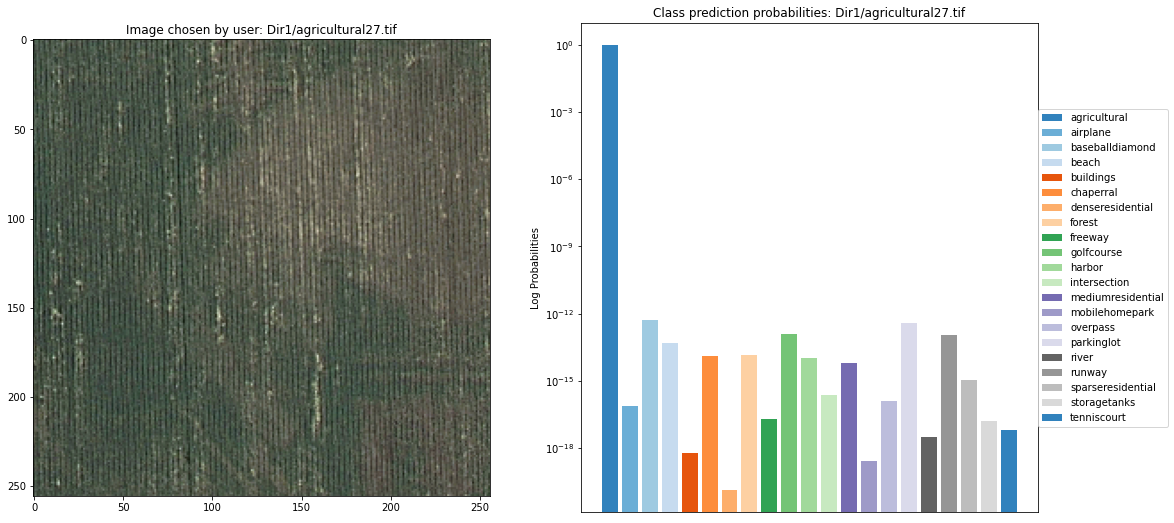

['Dir1/agricultural27.tif', 'Dir2/int99.tif', 'Dir3/river99.tif']
Enter the name of the file you would like to predict: Dir2/int99.tif


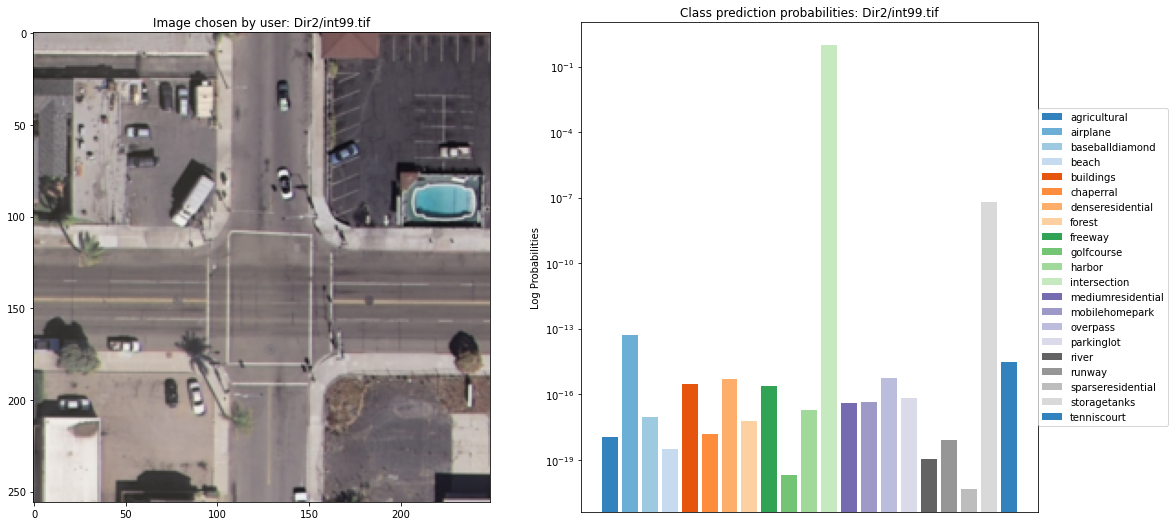

['Dir1/agricultural27.tif', 'Dir2/int99.tif', 'Dir3/river99.tif']
Enter the name of the file you would like to predict: Dir3/river99.tif


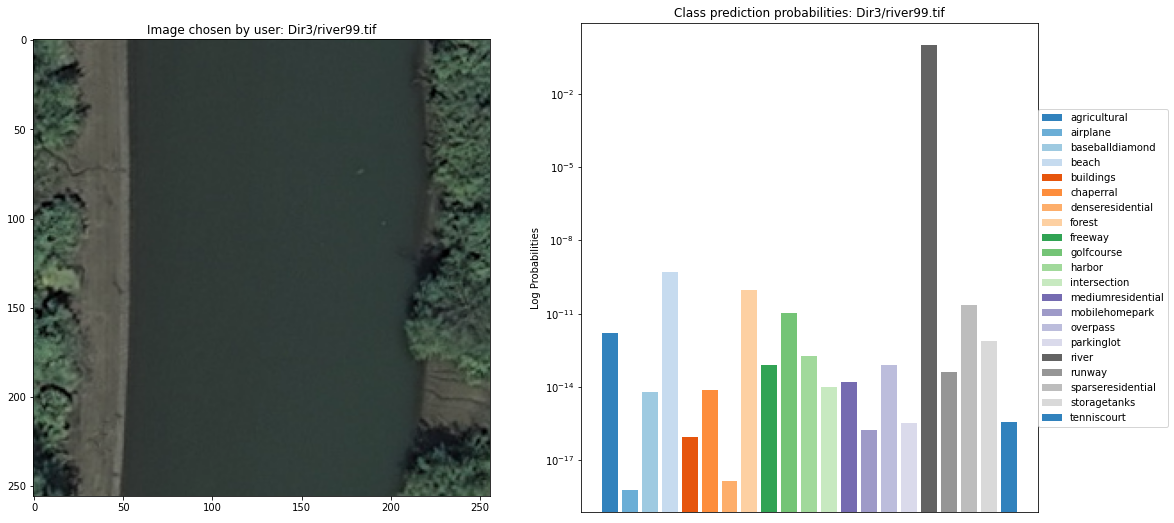

['Dir1/agricultural27.tif', 'Dir2/int99.tif', 'Dir3/river99.tif']
Enter the name of the file you would like to predict: done


In [1]:
import os
import numpy as np
import pathlib
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.image as mpimg
from google.colab import drive
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

drive.mount('/content/drive', force_remount=True)
print(os.chdir('/content/drive/MyDrive/Advanced Analytics'))
#print(os.listdir())

def prodImagesOnSavedModel():

    image = None
    labelsIndex = np.arange(0,21,1)

    labelsAll = ['agricultural','airplane','baseballdiamond','beach',
               'buildings','chaperral','denseresidential','forest','freeway',
               'golfcourse','harbor','intersection','mediumresidential',
               'mobilehomepark','overpass','parkinglot','river','runway',
               'sparseresidential','storagetanks','tenniscourt']

    labelsDict = dict(zip(labelsIndex,labelsAll))

    #print(labelsDict)
    path = r'/content/drive/MyDrive/Advanced Analytics'
    
    prod_dir = os.path.join(path,'prod')
    prod_dir = pathlib.Path(prod_dir)
    prod_image_count = len(list(prod_dir.glob('*/*.tif')))

    prod_Image_generator = ImageDataGenerator(rescale=1./255)
    prod_data_gen = prod_Image_generator.flow_from_directory(directory=prod_dir,
                                                            color_mode="rgb",
                                                            target_size=(224,224),
                                                            class_mode='categorical',
                                                            shuffle=False)

    savedModel = tf.keras.models.load_model('savedClassModel.h5')
    labels = (prod_data_gen.class_indices)
    labels = dict((v,k) for k,v in labelsDict.items())
    predict = savedModel.predict(prod_data_gen)
    predicted_class_indices = np.argmax(predict,axis=1)
    predicted_dict = {k: labelsDict[k] for k in labelsDict.keys() & set(predicted_class_indices)}
    print(predicted_dict)

    filenames = prod_data_gen.filenames
    
    while image != 'done':
      try:
        print(filenames)
        image = input('Enter the name of the file you would like to predict: ')
        if image == 'done': break
        index_ = filenames.index(image)

        my_cmap = plt.get_cmap('tab20c')

        plt.figure(figsize=(18, 9))

        plt.subplot(1, 2, 1)
        plt.title('Image chosen by user: '+str(filenames[index_]))
        img = mpimg.imread(str(prod_dir)+'/'+str(image))
        plt.imshow(img)

        plt.subplot(1, 2, 2)
        plot = plt.bar(labelsAll,predict[index_],data=predict[index_],log=True,color=my_cmap.colors)
        plt.xticks([])
        plt.ylabel('Log Probabilities')
        plt.title('Class prediction probabilities: '+str(filenames[index_]))
        plt.legend(plot,[i for i in labels.keys()],loc='center left', bbox_to_anchor=(.99, 0.5))

      except ValueError:
        print('You entered an invalid file name')
        pass

      plt.show(block=False)
      plt.pause(5)
      plt.close()


prodImagesOnSavedModel()

